In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pingouin as pg
%matplotlib inline

In [3]:
data = pd.read_csv('ChickFlick.csv')

In [10]:
data.head()

,gender,film,arousal,genderX,filmX
0,Male,Bridget Jones' Diary,22,0,0
1,Male,Bridget Jones' Diary,13,0,0
2,Male,Bridget Jones' Diary,16,0,0
3,Male,Bridget Jones' Diary,10,0,0
4,Male,Bridget Jones' Diary,18,0,0


In [7]:
data['genderX'] = data['gender'].replace({'Male':0, 'Female':1})
data['filmX']   = data['film'].replace({'Bridget Jones\' Diary':0,'Memento':1})

In [12]:
data.groupby(['genderX', 'filmX'])['arousal'].describe()

count  mean       std   min    25%   50%    75%   max
genderX filmX                                                       
0       0       10.0  17.2  4.779586  10.0  13.25  17.0  21.25  24.0
        1       10.0  25.8  7.238784  16.0  20.25  25.5  31.00  37.0
1       0       10.0  12.4  5.796551   3.0   8.00  14.0  15.75  20.0
        1       10.0  24.7  7.364328  14.0  21.25  24.0  30.75  36.0

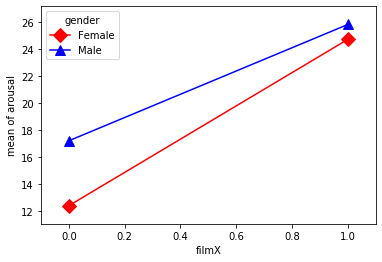

In [13]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(data.filmX, data.gender, data.arousal,
             colors=['red','blue'], markers=['D','^'], ms=10)

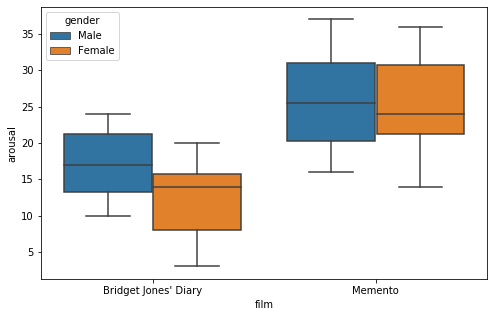

In [19]:
plt.figure(figsize=(8,5))
_ = sns.boxplot(x='film', y='arousal', hue='gender', data=data)

In [20]:
pg.homoscedasticity(data, dv='arousal',group='filmX')

,W,pval,equal_var
levene,1.805141,0.187061,True


In [21]:
pg.homoscedasticity(data, dv='arousal',group='genderX')

,W,pval,equal_var
levene,0.87609,0.355186,True


In [22]:
unique_list = [1,2,3,4]
unique_list

[1, 2, 3, 4]

In [23]:
data['interaction'] = 0

In [24]:
for i in range(4):
    for j in range(10):
        data.at[10*i+j,'interaction'] = unique_list[i]

In [26]:
pg.homoscedasticity(data, dv='arousal',group='interaction')

,W,pval,equal_var
levene,0.83111,0.485553,True


### A non-significant result like the one we have here, W(3, 36) = .83111, p = .485, is indicative of the assumption being met.

In [27]:
m01 = smf.ols('arousal~C(genderX)*C(filmX)', data=data).fit()
m01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                arousal   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     9.920
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           6.61e-05
Time:                        08:55:17   Log-Likelihood:                -128.81
No. Observations:                  40   AIC:                             265.6
Df Residuals:                      36   BIC:                             272.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        17.2000      2.019      8.518      0.000      13.105      21.295
C(genderX)[T.1]                  -4.8000      2.856     -1.681      0.101     -10.591       0.991
C(filmX)[T.1]                     8.6000      2.856      3.012      0.005       2.809      14.391
C(genderX)[T.1]:C(filmX)[T.1]     3.7000      4.038      0.916      0.366      -4.490      11.890
==============================================================================
Omnibus:                        3.180   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                1.527
Skew:                          -0.027   Prob(JB):                        0.466
Kurtosis:                       2.044   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
data.groupby(['genderX'])['arousal'].describe()

,count,mean,std,min,25%,50%,75%,max
genderX,,,,,,,,
0,20.0,21.50,7.423292,10.0,16.00,20.5,24.75,37.0
1,20.0,18.55,9.023216,3.0,13.75,17.5,23.50,36.0


In [29]:
data.groupby(['filmX'])['arousal'].describe()

,count,mean,std,min,25%,50%,75%,max
filmX,,,,,,,,
0,20.0,14.80,5.727128,3.0,12.50,15.0,19.0,24.0
1,20.0,25.25,7.129442,14.0,20.75,24.5,31.0,37.0


In [30]:
contrast_gen = np.array([[1,-1]])
contrast_gen =contrast_gen.reshape(2,1)
contrast_gen

array([[ 1],
       [-1]])

In [31]:
contrast_film = np.array([[1,-1]])
contrast_film =contrast_film.reshape(2,1)
contrast_film

array([[ 1],
       [-1]])

In [32]:
m02 = smf.ols('arousal~C(genderX,contrast_gen)*C(filmX, contrast_film)', data=data).fit()
m02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                arousal   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     9.920
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           6.61e-05
Time:                        09:00:45   Log-Likelihood:                -128.81
No. Observations:                  40   AIC:                             265.6
Df Residuals:                      36   BIC:                             272.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                             20.0250      1.010     19.835      0.000      17.977      22.073
C(genderX, contrast_gen)[custom0]                                      1.4750      1.010      1.461      0.153      -0.573       3.523
C(filmX, contrast_film)[custom0]                                      -5.2250      1.010     -5.175      0.000      -7.273      -3.177
C(genderX, contrast_gen)[custom0]:C(filmX, contrast_film)[custom0]     0.9250      1.010      0.916      0.366      -1.123       2.973
==============================================================================
Omnibus:                        3.180   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                1.527
Skew:                          -0.027   Prob(JB):                        0.466
Kurtosis:                       2.044   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
sm.stats.anova_lm(m02,typ=3)

,sum_sq,df,F,PR(>F)
Intercept,16040.025,1.0,393.432513,5.755487e-21
"C(genderX, contrast_gen)",87.025,1.0,2.134564,1.526853e-01
"C(filmX, contrast_film)",1092.025,1.0,26.785378,8.780040e-06
"C(genderX, contrast_gen):C(filmX, contrast_film)",34.225,1.0,0.839477,3.656436e-01
Residual,1467.700,36.0,NaN,NaN


In [35]:
prediction = pd.DataFrame(m01.fittedvalues)
prediction.columns = ['predicted'] 
prediction.tail()

,predicted
35,24.7
36,24.7
37,24.7
38,24.7
39,24.7


In [36]:
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()

In [37]:
import statsmodels.stats.outliers_influence as sms

In [38]:
summary_frame = sms.OLSInfluence(m01).summary_frame()

In [39]:
summary_frame = pd.merge(summary_frame, prediction, how = 'inner', left_index = True, right_index = True)

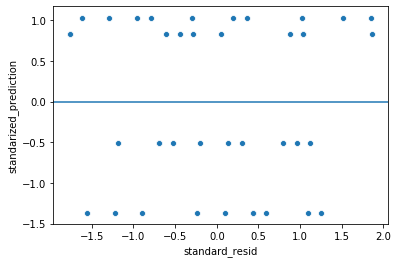

In [41]:
_ = sns.scatterplot(x = 'standard_resid', y='standarized_prediction', data = summary_frame)
_ = plt.axhline(y=0)

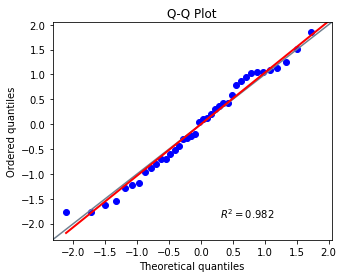

In [42]:
_ = pg.qqplot(summary_frame['standard_resid'], confidence=False)

### From above graphs we can say that our assumptions have been met.

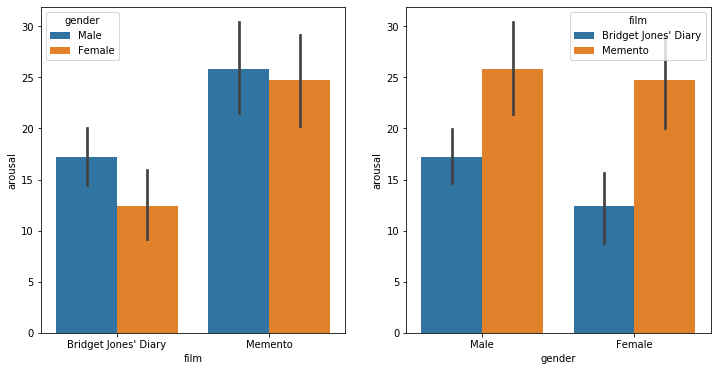

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
_ = sns.barplot(x='film', y='arousal', data=data, hue='gender')
plt.subplot(1,2,2)
_ = sns.barplot(x='gender', y='arousal', data=data, hue='film')

In [44]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [46]:
multicomp = MultiComparison(data['arousal'], data['interaction'])   # testfunc

In [48]:
# Bonferroni
com = multicomp.allpairtest(st.ttest_ind, method='bonf')
print(com[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     1      2 -3.1352 0.0057    0.0343   True
     1      3  2.0204 0.0585    0.3509  False
     1      4 -2.7014 0.0146    0.0876  False
     2      3  4.5694 0.0002    0.0014   True
     2      4  0.3369 0.7401       1.0  False
     3      4 -4.1503 0.0006    0.0036   True
---------------------------------------------


In [54]:
sm.stats.anova_lm(m01)

,df,sum_sq,mean_sq,F,PR(>F)
C(genderX),1.0,87.025,87.025000,2.134564,0.152685
C(filmX),1.0,1092.025,1092.025000,26.785378,0.000009
C(genderX):C(filmX),1.0,34.225,34.225000,0.839477,0.365644
Residual,36.0,1467.700,40.769444,NaN,NaN


In [55]:
# a is the number of levels of the first independent variable
# b is the number of levels of the second independent variable 
# n is the number of people per condition.
def Omega_factorial(n,a,b, MSa, MSb, MSab, MSr):
    varA = ((a-1)*(MSa-MSr))/(n*a*b)
    varB = ((b-1)*(MSb-MSr))/(n*a*b)
    varAB = ((a-1)*(b-1)*(MSab-MSr))/(n*a*b)
    varTotal = varA+varB+varAB+MSr
    print("Omega-Squared A: ", varA/varTotal)
    print("Omega-Squared B: ", varB/varTotal)
    print("Omega-Squared AB: ", varAB/varTotal)

In [56]:
Omega_factorial(10, 2, 2,87.025, 1092.025, 34.225, 40.769444)

Omega-Squared A:  0.01699481976490704
Omega-Squared B:  0.3862433023413909
Omega-Squared AB:  -0.00240450349881271


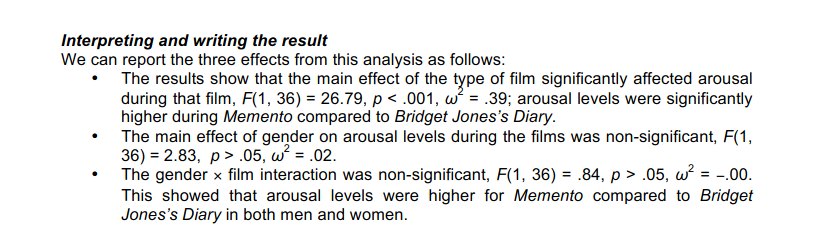

In [57]:
from IPython.display import Image
Image('chick.png')